# Wordgame Word2Vec features
Welcome to the second notebook in my wordgame project. In this notebook our goal is to extract a the similarity of the word pairs based on Word2Vec. Word2Vec is a model.. 

a) open tail
b) compute sim 
1) Compare sim with sim of random word pairs (shift) 
2) Plot all sim dists 
3) Plot specific. word 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/processed/wordgame_20170628_basicfeatures.csv', dtype={'nt': np.bool, 'word1':str, 'word2':str})

df.head()

,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit
0,1203,jailed,imprisoned,ecig,4,True,6,10,4,7,0.051471
1,5839,me,liverbird,wrongplanet,9,False,2,9,7,8,0.094118
2,2962,reach,up,sas,7,True,5,2,3,5,0.172414
3,1066,owie,band-aid,ecig,4,True,4,8,4,7,0.087500
4,5006,water,river,wrongplanet,9,False,5,5,0,3,0.060000


In [7]:
from gensim.models.keyedvectors import KeyedVectors

w2v_model = KeyedVectors.load_word2vec_format('../data/external/GoogleNews-vectors-negative300.bin', binary=True)
print('Loaded word embeddings')

Loaded word embeddings


In [53]:
#
def inVocab(r):
    if (r.word1 in w2v_model.vocab) & (r.word2 in w2v_model.vocab):    
        return True
    return False

df['invoc'] = df.apply(inVocab, axis=1)

#
def calcVec(r): 
    if r.invoc:
        return (w2v_model.word_vec(r.word1), w2v_model.word_vec(r.word2)) 
    else:
        return (0,0)
    
df['wv1'],df['wv2'] = zip(*df.apply(calcVec, axis=1))

#
def similarity(r):
    if r.invoc:
        return w2v_model.similarity(r.word1, r.word2)
    else:
        return 0
    
df['sim'] = df.apply(similarity, axis=1) 
print("finished")

finished


In [55]:
# remove a words (pairs) that are not in vocabulary
df = df[df['invoc']]
print("Number of remaining word pairs: " +str(len(df)))
print("Mean similariy score: " +str(df['sim'].mean()))

Number of remaining word pairs: 272708
Mean similariy score: 0.268906919797


81% of pairs in vocabulary. sim = 0.27



In [27]:
#word1_list = ['music','water']
#word2_list = ['music','water']
#tdf = df[(df['word1'].isin(word1_list)) | (df['word2'].isin(word2_list))]

Number of NT word pairs: 214613
	Mean similarity: 0.26703453666
Number of ASD word pairs: 58095
	Mean similarity: 0.275823827657


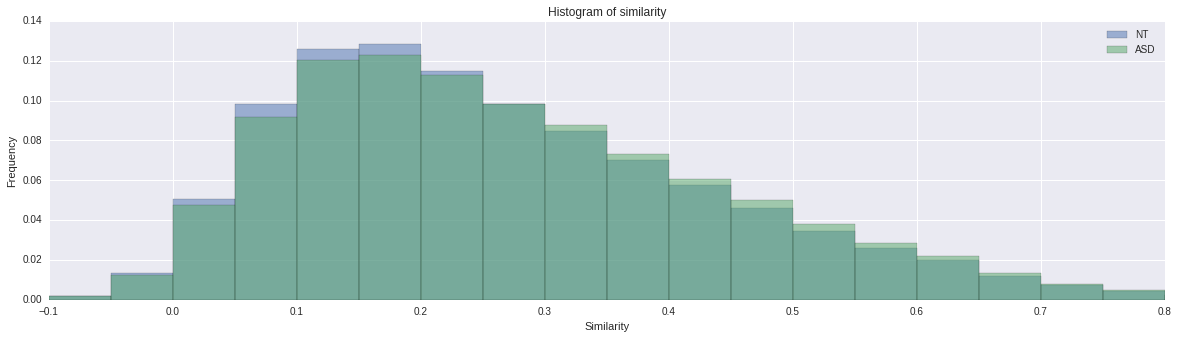

In [30]:
nt = df[df['nt']].sim
asd = df[df['nt']==False].sim

print("Number of NT word pairs: " + str(len(nt)))
print("\tMean similarity: " + str(nt.mean()))
print("Number of ASD word pairs: " + str(len(asd)))
print("\tMean similarity: " + str(asd.mean()))

#plot
w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)
bins = np.arange(-2,2,0.05)

plt.figure(figsize=(20, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="NT", weights=w1)
plt.hist(asd, bins=bins, alpha=0.5, label="ASD", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.1,0.8])
plt.show()

1000 assocations! Still differences! I think that is good? or overfitting...? 

What to do?? 


# TSNE



In [97]:
from sklearn.manifold import TSNE

pal = sns.color_palette()

word_list1 = ['king', 'queen', 'prince','princess','man','woman']
word_list2 = ['paris', 'france', 'london', 'england', 'madrid', 'spain', 'rome', 'italy', 'berlin', 'germany']
word_list3 = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

sample1 = df[(df['word1'].isin(word_list1))]
sample2 = df[(df['word1'].isin(word_list2))]
sample3 = df[(df['word1'].isin(word_list3))]

print("Number of pairs in sample 1: "+ str(len(sample1)))
print("Number of pairs in sample 2: "+ str(len(sample2)))
print("Number of pairs in sample 3: "+ str(len(sample3)))

Number of pairs in sample 1: 954
Number of pairs in sample 2: 386
Number of pairs in sample 3: 500


In [98]:
# Compute reduced word-vectors
reduced1 = TSNE(random_state=42).fit_transform(sample1['wv2'].tolist()) 
reduced2 = TSNE(random_state=42).fit_transform(sample2['wv2'].tolist()) 
reduced3 = TSNE(random_state=42).fit_transform(sample3['wv2'].tolist()) 
print("Finished")

Finished


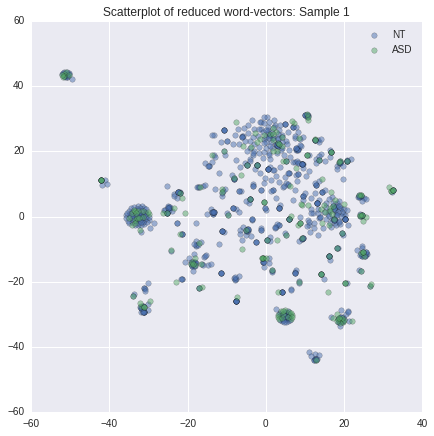

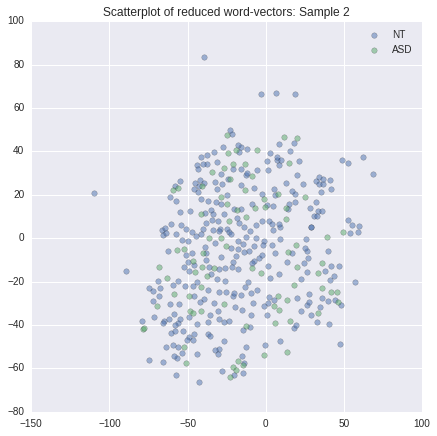

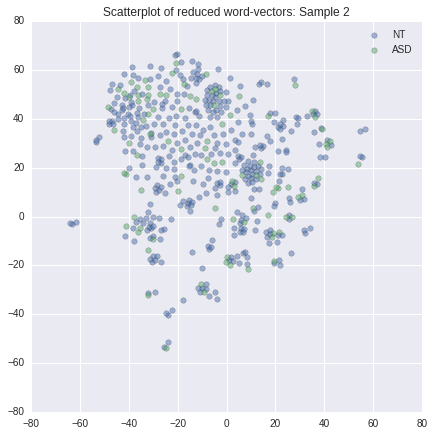

In [103]:
# split data into NT/ASD groups
nt_sample1 = reduced1[sample1['nt']]
asd_sample1 = reduced1[sample1['nt']==False]
nt_sample2 = reduced2[sample2['nt']]
asd_sample2 = reduced2[sample2['nt']==False]
nt_sample3 = reduced3[sample3['nt']]
asd_sample3 = reduced3[sample3['nt']==False]

# Plots
plt.figure(figsize=(7, 7))
plt.scatter(nt_sample1[:,0], nt_sample1[:,1], marker='o', s=30, c=pal[0], alpha=0.5, label='NT')
plt.scatter(asd_sample1[:,0], asd_sample1[:,1], marker='o', s=30, c=pal[1], alpha=0.5, label='ASD')
plt.title('Scatterplot of reduced word-vectors: Sample 1')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(nt_sample2[:,0], nt_sample2[:,1], marker='o', s=30, c=pal[0], alpha=0.5, label='NT')
plt.scatter(asd_sample2[:,0], asd_sample2[:,1], marker='o', s=30, c=pal[1], alpha=0.5, label='ASD')
plt.title('Scatterplot of reduced word-vectors: Sample 2')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(nt_sample3[:,0], nt_sample3[:,1], marker='o', s=30, c=pal[0], alpha=0.5, label='NT')
plt.scatter(asd_sample3[:,0], asd_sample3[:,1], marker='o', s=30, c=pal[1], alpha=0.5, label='ASD')
plt.title('Scatterplot of reduced word-vectors: Sample 3')
plt.legend(loc='upper right')
plt.show()